In [38]:
import pandas as pd
import os,pathlib
import pickle
import datetime as dt
import numpy as np
import time, warnings

warnings.filterwarnings("ignore")


In [4]:
path = pathlib.Path(r"C:\Users\saisu\Desktop\Module 5\Business Case Study\Assignment\yelp_dataset")
os.chdir(path)

In [5]:
with open('review1.pkl', 'rb') as a, open('review2.pkl', 'rb') as b, open('review3.pkl', 'rb') as c, open('review4.pkl', 'rb') as d:
    review1 = pickle.load(a)
    review2 = pickle.load(b)
    review3 = pickle.load(c)
    review4 = pickle.load(d)

In [6]:
business = pd.read_json("business.json",lines = True)
len(business)

192609

In [7]:
business.loc[business['categories'].isna()].review_count.sum()
business.dropna(subset=['categories'],inplace=True)
len(business)

192127

In [8]:
us = business[business['state'].str.contains('AB|QC|BC|BAS|XGM|XWY|CON|DUR|XGL|DOW') == False]
us = us[us.postal_code.str.isnumeric() == True]
us_restaurants = us[us['categories'].str.contains('Restaurants')]
us_restaurants = us_restaurants.reset_index()

In [9]:
len(us_restaurants)

35826

In [10]:
us_restaurants.is_copy=False
us_restaurants['cuisine']=pd.Series()
us_restaurants.loc[us_restaurants.categories.str.contains('American') & us_restaurants.categories.str.contains('Traditional'),'cuisine'] = 'American Traditional'
us_restaurants.loc[us_restaurants.categories.str.contains('American') & us_restaurants.categories.str.contains('New'),'cuisine'] = 'American New'
us_restaurants.loc[us_restaurants.categories.str.contains('Mexican'), 'cuisine'] = 'Mexican'
us_restaurants.loc[us_restaurants.categories.str.contains('Italian'), 'cuisine'] = 'Italian'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese') & us_restaurants.categories.str.contains('Chinese'), 'cuisine'] = 'Japanese and Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese') & (us_restaurants.categories.str.contains('Chinese') == False), 'cuisine'] = 'Japanese'
us_restaurants.loc[(us_restaurants.categories.str.contains('Japanese')== False) & us_restaurants.categories.str.contains('Chinese'), 'cuisine'] = 'Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Thai'), 'cuisine'] = 'Thai'
us_restaurants.loc[us_restaurants.categories.str.contains('Mediterranean'), 'cuisine'] = 'Mediterranean'
us_restaurants.loc[us_restaurants.categories.str.contains('French'), 'cuisine'] = 'French'
us_restaurants.loc[us_restaurants.categories.str.contains('Vietnamese'), 'cuisine'] = 'Vietnamese'
us_restaurants.loc[us_restaurants.categories.str.contains('Greek'),'cuisine'] = 'Greek'
us_restaurants.loc[us_restaurants.categories.str.contains('Indian'),'cuisine'] = 'Indian'
us_restaurants.loc[us_restaurants.categories.str.contains('Korean'),'cuisine'] = 'Korean'
us_restaurants.loc[us_restaurants.categories.str.contains('Hawaiian'),'cuisine'] = 'Hawaiian'
us_restaurants.loc[us_restaurants.categories.str.contains('African'),'cuisine'] = 'African'
us_restaurants.loc[us_restaurants.categories.str.contains('Spanish'),'cuisine'] = 'Spanish'

C:\Users\saisu\Anaconda3\lib\site-packages\pandas\core\generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\saisu\Anaconda3\lib\site-packages\pandas\core\generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [11]:
us_restaurants['sub_cuisine'] = pd.Series()

us_restaurants.loc[us_restaurants.categories.str.contains('Tex') & us_restaurants.categories.str.contains('Mex'),'sub_cuisine'] = 'Tex Mex'
us_restaurants.loc[(us_restaurants.categories.str.contains('Food') & us_restaurants.categories.str.contains('Trucks'))| (us_restaurants.categories.str.contains('Street')& us_restaurants.categories.str.contains('Vendors')) | us_restaurants.categories.str.contains('Stands'),'sub_cuisine'] = 'Food Stands'
us_restaurants.loc[us_restaurants.categories.str.contains('Street') & us_restaurants.categories.str.contains('Vendors'),'sub_cuisine'] = 'Street Vendors'
us_restaurants.loc[us_restaurants.categories.str.contains('Hot') & us_restaurants.categories.str.contains('Dogs'),'sub_cuisine'] = 'Hot Dogs'
us_restaurants.loc[us_restaurants.categories.str.contains('Bubble') & us_restaurants.categories.str.contains('Tea'),'sub_cuisine'] = 'Bubble Tea'
us_restaurants.loc[us_restaurants.categories.str.contains('Gluten') & us_restaurants.categories.str.contains('Free'),'sub_cuisine'] = 'Gluten Free'
us_restaurants.loc[us_restaurants.categories.str.contains('Chicken') & us_restaurants.categories.str.contains('Wings'),'sub_cuisine'] = 'Chicken Wings'
us_restaurants.loc[us_restaurants.categories.str.contains('Ethnic') & us_restaurants.categories.str.contains('Food'),'sub_cuisine'] = 'Ethnic Food'
us_restaurants.loc[us_restaurants.categories.str.contains('Specialty') & us_restaurants.categories.str.contains('Food'),'sub_cuisine'] = 'Specialty Food'
us_restaurants.loc[us_restaurants.categories.str.contains('Hot') & us_restaurants.categories.str.contains('Pot'),'sub_cuisine'] = 'Hot Pot'
us_restaurants.loc[us_restaurants.categories.str.contains('Dim') & us_restaurants.categories.str.contains('Sum'),'sub_cuisine'] = 'Dim Sum'
us_restaurants.loc[us_restaurants.categories.str.contains('Latin') & us_restaurants.categories.str.contains('American'),'sub_cuisine'] = 'Latin American'
us_restaurants.loc[us_restaurants.categories.str.contains('Barbeque'),'sub_cuisine'] = 'Barbeque'
us_restaurants.loc[us_restaurants.categories.str.contains('Falafel'),'sub_cuisine'] = 'Falafel'
us_restaurants.loc[us_restaurants.categories.str.contains('Halal'),'sub_cuisine'] = 'Halal'
us_restaurants.loc[us_restaurants.categories.str.contains('Salad'),'sub_cuisine'] = 'Salad'
us_restaurants.loc[us_restaurants.categories.str.contains('Kosher'),'sub_cuisine'] = 'Kosher'
us_restaurants.loc[us_restaurants.categories.str.contains('Lounges'),'sub_cuisine'] = 'Lounges'
us_restaurants.loc[us_restaurants.categories.str.contains('Creperies'),'sub_cuisine'] = 'Creperies'
us_restaurants.loc[us_restaurants.categories.str.contains('Brasseries'),'sub_cuisine'] = 'Brasseries'
us_restaurants.loc[us_restaurants.categories.str.contains('Bistros'),'sub_cuisine'] = 'Bistros'
us_restaurants.loc[us_restaurants.categories.str.contains('Lounges'),'sub_cuisine'] = 'Lounges'
us_restaurants.loc[us_restaurants.categories.str.contains('Kebab'),'sub_cuisine'] = 'Kebab'
us_restaurants.loc[us_restaurants.categories.str.contains('Caribbean'),'sub_cuisine'] = 'Caribbean'
us_restaurants.loc[us_restaurants.categories.str.contains('Kebab'),'sub_cuisine'] = 'Kebab'
us_restaurants.loc[us_restaurants.categories.str.contains('Karaoke'),'sub_cuisine'] = 'Karaoke'
us_restaurants.loc[us_restaurants.categories.str.contains('Poke'),'sub_cuisine'] = 'Poke'
us_restaurants.loc[us_restaurants.categories.str.contains('Caterers'),'sub_cuisine'] = 'Caterers'
us_restaurants.loc[us_restaurants.categories.str.contains('Filipino'),'sub_cuisine'] = 'Filipino'
us_restaurants.loc[us_restaurants.categories.str.contains('Portuguese'),'sub_cuisine'] = 'Portuguese'
us_restaurants.loc[us_restaurants.categories.str.contains('Tacos'),'sub_cuisine'] = 'Tacos'
us_restaurants.loc[us_restaurants.categories.str.contains('Basque'),'sub_cuisine'] = 'Basque'
us_restaurants.loc[us_restaurants.categories.str.contains('Sandwiches'),'sub_cuisine'] = 'Sandwiches'
us_restaurants.loc[us_restaurants.categories.str.contains('Szechuan'),'sub_cuisine'] = 'Szechuan'
us_restaurants.loc[us_restaurants.categories.str.contains('Cantonese'),'sub_cuisine'] = 'Cantonese'
us_restaurants.loc[us_restaurants.categories.str.contains('Seafood'),'sub_cuisine'] = 'Seafood'
us_restaurants.loc[us_restaurants.categories.str.contains('Steakhouses'),'sub_cuisine'] = 'Steakhouses'
us_restaurants.loc[us_restaurants.categories.str.contains('Buffets'),'sub_cuisine'] = 'Buffets'
us_restaurants.loc[us_restaurants.categories.str.contains('Desserts'),'sub_cuisine'] = 'Desserts'
us_restaurants.loc[us_restaurants.categories.str.contains('Izakaya'),'sub_cuisine'] = 'Izakaya'
us_restaurants.loc[us_restaurants.categories.str.contains('Bars') | us_restaurants.categories.str.contains('Nightlife') | us_restaurants.categories.str.contains('Pubs'),'sub_cuisine'] = 'Bars'
us_restaurants.loc[us_restaurants.categories.str.contains('Burgers'),'sub_cuisine'] = 'Burgers'
us_restaurants.loc[us_restaurants.categories.str.contains('Vegetarian') & us_restaurants.categories.str.contains('Vegan'),'sub_cuisine'] = 'Vegetarian'
us_restaurants.loc[us_restaurants.categories.str.contains('Fast') & us_restaurants.categories.str.contains('Food'),'sub_cuisine'] = 'Fast Food'
us_restaurants.loc[us_restaurants.categories.str.contains('Pizza'),'sub_cuisine'] = 'Pizza'
us_restaurants.loc[us_restaurants.categories.str.contains('Cafes'),'sub_cuisine'] = 'Cafes'
us_restaurants.loc[us_restaurants.categories.str.contains('Comfort') & us_restaurants.categories.str.contains('Food'),'sub_cuisine'] = 'Comfort Food'
us_restaurants.loc[us_restaurants.categories.str.contains('Sushi') & us_restaurants.categories.str.contains('Bars'),'sub_cuisine'] = 'Sushi Bars'
us_restaurants.loc[us_restaurants.categories.str.contains('Ramen') & us_restaurants.categories.str.contains('Noodles'),'sub_cuisine'] = 'Ramen'
us_restaurants.loc[us_restaurants.categories.str.contains('Breakfast') & us_restaurants.categories.str.contains('Brunch'),'sub_cuisine'] = 'Breakfast & Brunch'

In [12]:
us_restaurants_review1 = pd.merge(us_restaurants,review1, how='left', left_on='business_id', right_on='business_id')
us_restaurants_review2 = pd.merge(us_restaurants,review2, how='left', left_on='business_id', right_on='business_id')
us_restaurants_review3 = pd.merge(us_restaurants,review3, how='left', left_on='business_id', right_on='business_id')
us_restaurants_review4 = pd.merge(us_restaurants,review4, how='left', left_on='business_id', right_on='business_id')

In [13]:
us_restaurants_review = pd.concat([us_restaurants_review1, us_restaurants_review2,us_restaurants_review3,us_restaurants_review4])

In [14]:
us_restaurants_review

,index,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,...,cuisine,sub_cuisine,review_id,user_id,stars_y,useful,funny,cool,text,date
0,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,F7POrJsNbhu493DSTMPXjw,nsS4oDfOsl20QdWc6XcOkw,2.0,1.0,0.0,0.0,"Husband was craving Chicken Teriyaki & gyoza, ...",2014-02-24 02:51:56
1,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,c-6aA9Bd7JxpmMroRoas9A,bK4Y_GZUoAUTXIrmeEUGYw,4.0,0.0,0.0,1.0,Went there Saturday noon they open at 12pm but...,2014-07-13 20:28:18
2,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,P_MV_lMQjLIO9R7M_KIuMg,sbbB6Y4yIZIInvt0LFYYew,2.0,1.0,0.0,0.0,Went to this restaurant on Saturday as I had a...,2018-05-09 00:39:36
3,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,dCLBdXP9tjjQG7EkHNeWzQ,hhQUVO2AqBdSeQcPo19Bsw,5.0,4.0,2.0,3.0,This place will always have a place in my stom...,2017-10-25 13:58:04
4,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,GiBx0zRVxC1Bu-9R-MMF8w,XSz4svDvgOCRO92V_3ajWg,4.0,0.0,0.0,0.0,"Well first time I've really had ""authentic"" Ja...",2015-04-02 01:13:36
5,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,Ab8bNycXicrMmertb01VjA,rdFijkzU2nZwMZX6Gd-QGA,5.0,11.0,0.0,2.0,I just came back from living in Japan for two ...,2009-05-26 01:16:25
6,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,g0gMjs8Q1Dl5AxrM8QMiiA,7YeRMeb_cppMjjHAhT_k9A,5.0,4.0,0.0,0.0,First of all it must be said that this is a JA...,2010-11-26 17:24:39
7,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,Tam9bmU590RSbWDow31bMw,mWjq6ZpX0lodlk5sV2uRiQ,5.0,0.0,0.0,0.0,Located in a small plaza is an authentic Japan...,2015-10-17 18:32:49
8,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,tQNc1LC7ndW6q6IOcXhSAw,zDKszv6zpuLsVhPFZLctXQ,3.0,0.0,0.0,0.0,Waiting for my tekkadon I ate my miso soup but...,2017-03-04 04:17:52
9,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,s0hjJcVxVKLlXo5goOuFXw,JysF40STBTmx7h-sU1FHgg,5.0,3.0,1.0,0.0,Tonkatsu Ramen!!!\nITADAKIMAS!!\n\nThis place ...,2013-02-

In [15]:
us_restaurants_review[us_restaurants_review.cuisine.isna() == False].head(10)

,index,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,...,cuisine,sub_cuisine,review_id,user_id,stars_y,useful,funny,cool,text,date
0,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,F7POrJsNbhu493DSTMPXjw,nsS4oDfOsl20QdWc6XcOkw,2.0,1.0,0.0,0.0,"Husband was craving Chicken Teriyaki & gyoza, ...",2014-02-24 02:51:56
1,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,c-6aA9Bd7JxpmMroRoas9A,bK4Y_GZUoAUTXIrmeEUGYw,4.0,0.0,0.0,1.0,Went there Saturday noon they open at 12pm but...,2014-07-13 20:28:18
2,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,P_MV_lMQjLIO9R7M_KIuMg,sbbB6Y4yIZIInvt0LFYYew,2.0,1.0,0.0,0.0,Went to this restaurant on Saturday as I had a...,2018-05-09 00:39:36
3,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,dCLBdXP9tjjQG7EkHNeWzQ,hhQUVO2AqBdSeQcPo19Bsw,5.0,4.0,2.0,3.0,This place will always have a place in my stom...,2017-10-25 13:58:04
4,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,GiBx0zRVxC1Bu-9R-MMF8w,XSz4svDvgOCRO92V_3ajWg,4.0,0.0,0.0,0.0,"Well first time I've really had ""authentic"" Ja...",2015-04-02 01:13:36
5,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,Ab8bNycXicrMmertb01VjA,rdFijkzU2nZwMZX6Gd-QGA,5.0,11.0,0.0,2.0,I just came back from living in Japan for two ...,2009-05-26 01:16:25
6,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,g0gMjs8Q1Dl5AxrM8QMiiA,7YeRMeb_cppMjjHAhT_k9A,5.0,4.0,0.0,0.0,First of all it must be said that this is a JA...,2010-11-26 17:24:39
7,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,Tam9bmU590RSbWDow31bMw,mWjq6ZpX0lodlk5sV2uRiQ,5.0,0.0,0.0,0.0,Located in a small plaza is an authentic Japan...,2015-10-17 18:32:49
8,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,tQNc1LC7ndW6q6IOcXhSAw,zDKszv6zpuLsVhPFZLctXQ,3.0,0.0,0.0,0.0,Waiting for my tekkadon I ate my miso soup but...,2017-03-04 04:17:52
9,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,...,Japanese,Sushi Bars,s0hjJcVxVKLlXo5goOuFXw,JysF40STBTmx7h-sU1FHgg,5.0,3.0,1.0,0.0,Tonkatsu Ramen!!!\nITADAKIMAS!!\n\nThis place ...,2013-02-

In [16]:
us_restaurants_review.cuisine.isna().count()

3523358

In [17]:
us_restaurants_review.dropna(how='any',subset=['cuisine'],inplace=True)

In [18]:
len(us_restaurants_review)

2534163

Converting index to Datetime index

In [61]:
us_restaurants_review.index = pd.to_datetime(us_restaurants_review['date'])

In [ ]:
#us_restaurants_review.to_csv(r'C:\Users\saisu\Desktop\Module 5\Business Case Study\Assignment\us_restaurants_review.csv',index = None, header=True)

In [62]:
american_traditional_review = us_restaurants_review[us_restaurants_review['cuisine']=='American Traditional']
american_new_review = us_restaurants_review[us_restaurants_review['cuisine']=='American New']
mexican_review = us_restaurants_review[us_restaurants_review['cuisine']=='Mexican']
italian_review = us_restaurants_review[us_restaurants_review['cuisine']=='Italian']
japanese_chinese_review = us_restaurants_review[us_restaurants_review['cuisine']=='Japanese and Chinese']
japanese_review = us_restaurants_review[us_restaurants_review['cuisine']=='Japanese']
chinese_review = us_restaurants_review[us_restaurants_review['cuisine']=='Chinese']
thai_review = us_restaurants_review[us_restaurants_review['cuisine']=='Thai']
mediterranean_review = us_restaurants_review[us_restaurants_review['cuisine']=='Mediterranean']
french_review = us_restaurants_review[us_restaurants_review['cuisine']=='French']
vietnamese_review = us_restaurants_review[us_restaurants_review['cuisine']=='Vietnamese']
greek_review = us_restaurants_review[us_restaurants_review['cuisine']=='Greek']
indian_review = us_restaurants_review[us_restaurants_review['cuisine']=='Indian']
korean_review = us_restaurants_review[us_restaurants_review['cuisine']=='Korean']
hawaiian_review = us_restaurants_review[us_restaurants_review['cuisine']=='Hawaiian']
african_review = us_restaurants_review[us_restaurants_review['cuisine']=='African']
spanish_review = us_restaurants_review[us_restaurants_review['cuisine']=='Spanish']

In [63]:
american_traditional_review.head(5)

,index,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,...,cuisine,sub_cuisine,review_id,user_id,stars_y,useful,funny,cool,text,date
date,,,,,,,,,,,,,,,,,,,,,
2016-01-31 13:43:45,77,825 Commonwealth Ave,"{'GoodForMeal': '{'dessert': False, 'latenight...",KFbUQ-RR2UOV62Ep7WnXHw,"American (Traditional), Restaurants",West Mifflin,"{'Wednesday': '11:0-0:0', 'Thursday': '11:0-0:...",1,40.376674,-79.88248,...,American Traditional,NaN,mrSwzxCa7vLGVySm-b0tkw,2swV8V2modOHX6UXc0WUlQ,3.0,0.0,1.0,0.0,"In this order I would go Food, Atmosphere, Ser...",2016-01-31 13:43:45
2018-05-11 18:06:36,77,825 Commonwealth Ave,"{'GoodForMeal': '{'dessert': False, 'latenight...",KFbUQ-RR2UOV62Ep7WnXHw,"American (Traditional), Restaurants",West Mifflin,"{'Wednesday': '11:0-0:0', 'Thursday': '11:0-0:...",1,40.376674,-79.88248,...,American Traditional,NaN,rI0Z6eO0323bq_QBRfrIxg,vA1jGLAmaf3oUN_pkx3Tmg,3.0,0.0,0.0,0.0,My food was soggy and cold by the time it got ...,2018-05-11 18:06:36
2014-09-13 15:02:58,77,825 Commonwealth Ave,"{'GoodForMeal': '{'dessert': False, 'latenight...",KFbUQ-RR2UOV62Ep7WnXHw,"American (Traditional), Restaurants",West Mifflin,"{'Wednesday': '11:0-0:0', 'Thursday': '11:0-0:...",1,40.376674,-79.88248,...,American Traditional,NaN,YBLVHs-eXN8c8VxlFHGRRQ,UBUV0ElEvm8kgxZvcdDo2Q,4.0,1.0,0.0,0.0,Great new beer selection and they always offer...,2014-09-13 15:02:58
2017-04-01 23:33:33,77,825 Commonwealth Ave,"{'GoodForMeal': '{'dessert': False, 'latenight...",KFbUQ-RR2UOV62Ep7WnXHw,"American (Traditional), Restaurants",West Mifflin,"{'Wednesday': '11:0-0:0', 'Thursday': '11:0-0:...",1,40.376674,-79.88248,...,American Traditional,NaN,ycstwBwEEUY5WRdTiLfLrA,duaJxYWc5pxKuYll6L7sOg,5.0,1.0,0.0,2.0,Darn! Can it really get better? The smoked win...,2017-04-01 23:33:33
2016-01-27 19:39:31,77,825 Commonwealth Ave,"{'GoodForMeal': '{'dessert': False, 'latenight...",KFbUQ-RR2UOV62Ep7WnXHw,"American (Traditional), Restaurants",West Mifflin,"{'Wednesday': '11:0-0:0', 'Thursday': '11:0-0:...",1,40.376674,-79.88248,...,American Traditional,NaN,mq5IzRlv9_uB0Zjn6sK-iQ,hL2WRXhhRoK2IpZQv5sbbA,1.0,0.0,0.0,0.0,With so many local bars and restaurants in the...,2016-01-27 19:39:31


In [25]:

#american_traditional_review.dropna(subset=['date'],inplace=True)
#sum(american_traditional_review['date'].isna() == True)
#american_traditional_review['date'].isna

In [73]:
review_trend = pd.DataFrame(us_restaurants_review.review_id.resample('Y').count())
review_trend.columns = ['review_total']

In [74]:
review_trend

,review_total
date,
2004-12-31,4
2005-12-31,371
2006-12-31,2321
2007-12-31,9470
2008-12-31,23957
2009-12-31,41427
2010-12-31,76702
2011-12-31,119611
2012-12-31,138848


In [75]:
review_trend['american_traditional'] = american_traditional_review.review_id.resample('Y').count()
review_trend['american_new'] = american_new_review.review_id.resample('Y').count()
review_trend['mexican'] = mexican_review.review_id.resample('Y').count()
review_trend['italian'] = italian_review.review_id.resample('Y').count()
review_trend['japanese_chinese'] = japanese_chinese_review.review_id.resample('Y').count()
review_trend['japanese'] = japanese_review.review_id.resample('Y').count()
review_trend['chinese'] = chinese_review.review_id.resample('Y').count()
review_trend['thai'] = thai_review.review_id.resample('Y').count()
review_trend['mediterranean'] = mediterranean_review.review_id.resample('Y').count()
review_trend['french'] = french_review.review_id.resample('Y').count()
review_trend['vietnamese'] = vietnamese_review.review_id.resample('Y').count()
review_trend['greek'] = greek_review.review_id.resample('Y').count()
review_trend['indian'] = indian_review.review_id.resample('Y').count()
review_trend['korean'] = korean_review.review_id.resample('Y').count()
review_trend['hawaiian'] = hawaiian_review.review_id.resample('Y').count()
review_trend['african'] = african_review.review_id.resample('Y').count()
review_trend['spanish'] = spanish_review.review_id.resample('Y').count()

In [76]:
review_trend

,review_total,american_traditional,american_new,mexican,italian,japanese_chinese,japanese,chinese,thai,mediterranean,french,vietnamese,greek,indian,korean,hawaiian,african,spanish
date,,,,,,,,,,,,,,,,,,
2004-12-31,4,1,NaN,1,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-31,371,85,81.0,45,50.0,2.0,22.0,18,18.0,5.0,14.0,2.0,15.0,3.0,2.0,2.0,NaN,7.0
2006-12-31,2321,375,509.0,250,274.0,16.0,215.0,149,73.0,30.0,173.0,25.0,73.0,39.0,31.0,32.0,8.0,49.0
2007-12-31,9470,1614,1827.0,1095,1194.0,42.0,972.0,582,323.0,106.0,602.0,117.0,329.0,183.0,170.0,136.0,29.0,149.0
2008-12-31,23957,3732,4563.0,2945,3125.0,152.0,2076.0,1448,918.0,343.0,1391.0,457.0,899.0,512.0,535.0,330.0,117.0,414.0
2009-12-31,41427,6085,8401.0,5091,6015.0,303.0,3378.0,2400,1522.0,629.0,2277.0,853.0,1466.0,916.0,808.0,518.0,180.0,585.0
2010-12-31,76702,11528,16942.0,9459,10028.0,480.0,5926.0,4470,3195.0,1340.0,3666.0,1665.0,2397.0,1506.0,1624.0,1333.0,154.0,989.0
2011-12-31,119611,18210,27974.0,14752,15559.0,789.0,8523.0,7000,4875.0,2271.0,4975.0,2518.0,3579.0,2192.0,2568.0,1839.0,280.0,1707.0
2012-12-31,138848,22037,32630.0,17092,18522.0,919.0,9485.0,8104,5432.0,2942.0,5142.0,2984.0,3866.0,2802.0,2837.0,1988.0,350.0,1716.0


In [77]:
review_trend['american_traditional_rate'] = review_trend.iloc[:,1].values/review_trend['review_total'].values
review_trend['american_new_rate'] = review_trend.iloc[:,2].values/review_trend['review_total'].values
review_trend['mexican_rate'] = review_trend.iloc[:,3].values/review_trend['review_total'].values
review_trend['italian_rate'] = review_trend.iloc[:,4].values/review_trend['review_total'].values
review_trend['japanese_chinese_rate'] = review_trend.iloc[:,5].values/review_trend['review_total'].values
review_trend['japanese_rate'] = review_trend.iloc[:,6].values/review_trend['review_total'].values
review_trend['chinese_rate'] = review_trend.iloc[:,7].values/review_trend['review_total'].values
review_trend['thai_rate'] = review_trend.iloc[:,8].values/review_trend['review_total'].values
review_trend['mediterranean_rate'] = review_trend.iloc[:,9].values/review_trend['review_total'].values
review_trend['french_rate'] = review_trend.iloc[:,10].values/review_trend['review_total'].values
review_trend['vietnamese_rate'] = review_trend.iloc[:,11].values/review_trend['review_total'].values
review_trend['greek_rate'] = review_trend.iloc[:,12].values/review_trend['review_total'].values
review_trend['indian_rate'] = review_trend.iloc[:,13].values/review_trend['review_total'].values
review_trend['korean_rate'] = review_trend.iloc[:,14].values/review_trend['review_total'].values
review_trend['hawaiian_rate'] = review_trend.iloc[:,15].values/review_trend['review_total'].values
review_trend['african_rate'] = review_trend.iloc[:,16].values/review_trend['review_total'].values
review_trend['spanish_rate'] = review_trend.iloc[:,17].values/review_trend['review_total'].values


In [78]:
review_trend.columns

Index(['review_total', 'american_traditional', 'american_new', 'mexican',
       'italian', 'japanese_chinese', 'japanese', 'chinese', 'thai',
       'mediterranean', 'french', 'vietnamese', 'greek', 'indian', 'korean',
       'hawaiian', 'african', 'spanish', 'american_traditional_rate',
       'american_new_rate', 'mexican_rate', 'italian_rate',
       'japanese_chinese_rate', 'japanese_rate', 'chinese_rate', 'thai_rate',
       'mediterranean_rate', 'french_rate', 'vietnamese_rate', 'greek_rate',
       'indian_rate', 'korean_rate', 'hawaiian_rate', 'african_rate',
       'spanish_rate'],
      dtype='object')

In [31]:
#review_trend.drop(review_trend.columns[18:len(review_trend.columns)], axis=1, inplace = True)

In [79]:
review_trend.dropna(inplace = True)

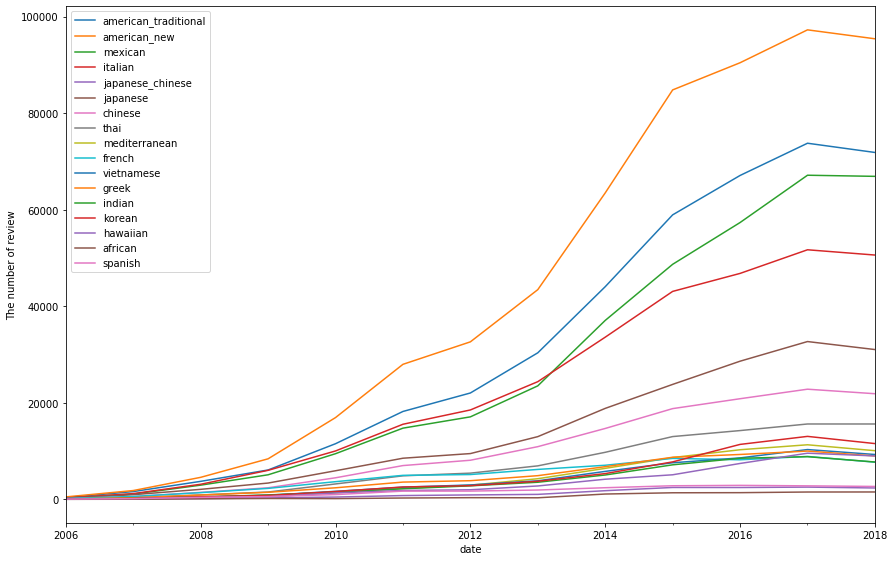

In [80]:
import matplotlib.pyplot as plt

review_trend.iloc[:,1:18].plot()
plt.ylabel('The number of review')
plt.legend(review_trend.iloc[:,1:18],loc = "upper left")
fig = plt.gcf()
fig.set_size_inches(14.5, 9.5)
plt.show()


In [81]:
review_trend

,review_total,american_traditional,american_new,mexican,italian,japanese_chinese,japanese,chinese,thai,mediterranean,...,thai_rate,mediterranean_rate,french_rate,vietnamese_rate,greek_rate,indian_rate,korean_rate,hawaiian_rate,african_rate,spanish_rate
date,,,,,,,,,,,,,,,,,,,,,
2006-12-31,2321,375,509.0,250,274.0,16.0,215.0,149,73.0,30.0,...,0.031452,0.012925,0.074537,0.010771,0.031452,0.016803,0.013356,0.013787,0.003447,0.021112
2007-12-31,9470,1614,1827.0,1095,1194.0,42.0,972.0,582,323.0,106.0,...,0.034108,0.011193,0.063569,0.012355,0.034741,0.019324,0.017951,0.014361,0.003062,0.015734
2008-12-31,23957,3732,4563.0,2945,3125.0,152.0,2076.0,1448,918.0,343.0,...,0.038319,0.014317,0.058062,0.019076,0.037526,0.021372,0.022332,0.013775,0.004884,0.017281
2009-12-31,41427,6085,8401.0,5091,6015.0,303.0,3378.0,2400,1522.0,629.0,...,0.036739,0.015183,0.054964,0.020590,0.035388,0.022111,0.019504,0.012504,0.004345,0.014121
2010-12-31,76702,11528,16942.0,9459,10028.0,480.0,5926.0,4470,3195.0,1340.0,...,0.041655,0.017470,0.047795,0.021707,0.031251,0.019634,0.021173,0.017379,0.002008,0.012894
2011-12-31,119611,18210,27974.0,14752,15559.0,789.0,8523.0,7000,4875.0,2271.0,...,0.040757,0.018987,0.041593,0.021052,0.029922,0.018326,0.021470,0.015375,0.002341,0.014271
2012-12-31,138848,22037,32630.0,17092,18522.0,919.0,9485.0,8104,5432.0,2942.0,...,0.039122,0.021189,0.037033,0.021491,0.027843,0.020180,0.020432,0.014318,0.002521,0.012359
2013-12-31,185162,30362,43445.0,23515,24382.0,1034.0,12995.0,10919,6941.0,4277.0,...,0.037486,0.023099,0.033511,0.020755,0.026517,0.019151,0.020258,0.014992,0.001766,0.010445
2014-12-31,267425,44057,63484.0,37070,33597.0,1795.0,18847.0,14688,9749.0,6424.0,...,0.036455,0.024022,0.026419,0.021670,0.025330,0.018876,0.019964,0.015608,0.004132,0.009027


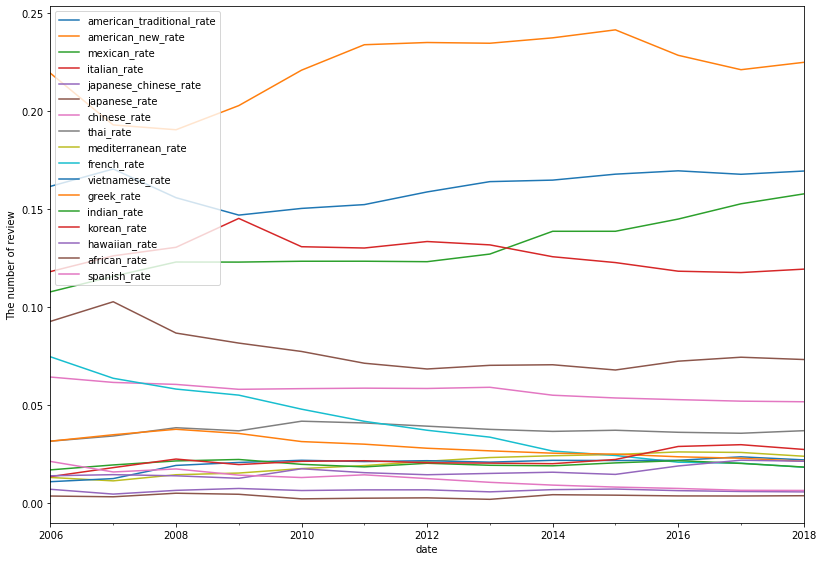

In [82]:
import matplotlib.pyplot as plt


review_trend.iloc[:,18:len(review_trend.columns)].plot()
plt.ylabel('The number of review')
plt.legend(review_trend.iloc[:,18:len(review_trend.columns)],loc = "upper left")
fig = plt.gcf()
fig.set_size_inches(13.5, 9.5)
#fig.savefig('test2png.png', dpi=100)


plt.show()

In [83]:
american_new_review.sub_cuisine.value_counts()

Bars                  169484
Breakfast & Brunch    156758
Burgers                53241
Pizza                  26516
Steakhouses            19441
Sandwiches             16818
Fast Food              14234
Cafes                  13702
Desserts               12922
Comfort Food           10135
Buffets                 7766
Caterers                5897
Sushi Bars              4858
Seafood                 4371
Salad                   3336
Vegetarian              1985
Gluten Free             1500
Hot Dogs                1196
Barbeque                1187
Chicken Wings           1084
Specialty Food           843
Brasseries               441
Bistros                  369
Filipino                 265
Street Vendors           108
Caribbean                103
Tex Mex                   73
Food Stands               64
Latin American            45
Name: sub_cuisine, dtype: int64

In [85]:
american_new_review.head(5)

,index,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,...,cuisine,sub_cuisine,review_id,user_id,stars_y,useful,funny,cool,text,date
date,,,,,,,,,,,,,,,,,,,,,
2014-10-11 03:53:53,140,95 W Boston,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",r8764MtYyt8JhxMvrfM_xQ,"American (New), Bars, Wine Bars, Nightlife, Re...",Chandler,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",0,33.302093,-111.842613,...,American New,Bars,CqMNjtG0hNZGhDw4RDE-zw,_Jg-IA0M-GSjBlGu-wmejg,2.0,0.0,0.0,0.0,I was really disappointed with my most recent ...,2014-10-11 03:53:53
2015-07-16 05:47:12,140,95 W Boston,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",r8764MtYyt8JhxMvrfM_xQ,"American (New), Bars, Wine Bars, Nightlife, Re...",Chandler,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",0,33.302093,-111.842613,...,American New,Bars,qKeqwYD5tP-wf3k43p3t1A,J8V1mIOTXYYonHhceDTdXQ,5.0,0.0,0.0,0.0,The staff was very friendly. Ahi tuna was exce...,2015-07-16 05:47:12
2015-09-24 00:09:55,140,95 W Boston,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",r8764MtYyt8JhxMvrfM_xQ,"American (New), Bars, Wine Bars, Nightlife, Re...",Chandler,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",0,33.302093,-111.842613,...,American New,Bars,XGho-0M4oF5KLn18IfLCWg,QQRsaX0DC2BDbGYVBulFpg,5.0,0.0,0.0,0.0,My spouse found a deal on Groupon and planned ...,2015-09-24 00:09:55
2015-09-24 02:37:19,140,95 W Boston,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",r8764MtYyt8JhxMvrfM_xQ,"American (New), Bars, Wine Bars, Nightlife, Re...",Chandler,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",0,33.302093,-111.842613,...,American New,Bars,JCgBZQGhTpET7KY14vKfwA,wYfaUo7BCW9MWPdb2QDKpA,3.0,0.0,0.0,0.0,Great live music and it was cozy by the firepl...,2015-09-24 02:37:19
2014-08-24 21:53:56,140,95 W Boston,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",r8764MtYyt8JhxMvrfM_xQ,"American (New), Bars, Wine Bars, Nightlife, Re...",Chandler,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",0,33.302093,-111.842613,...,American New,Bars,-xIAo73b8gEP5p2I8f6BTg,ia5kvJxYR8gPItl9O4W0Mg,4.0,2.0,0.0,0.0,Table was ready for 4 and a baby. I've been he...,2014-08-24 21:53:56


In [115]:
subcuisine_df = american_new_review.groupby([american_new_review.index.year,'sub_cuisine'], as_index = True).agg({'review_id': 'count'})
subcuisine_df.columns = ['review_id_count']

In [128]:
subcuisine_df.reset_index(level=['sub_cuisine'],inplace = True)

In [129]:
subcuisine_df.columns

Index(['sub_cuisine', 'review_id_count'], dtype='object')

In [245]:
subcuisine_df_copy = subcuisine_df.copy()
total_review = subcuisine_df.groupby(subcuisine_df.index).agg({'review_id_count': 'sum'})
total_review.columns = ['total_review_count']

In [247]:
subcuisine_df_new = pd.merge(subcuisine_df,total_review, how = 'left', left_index=True, right_index=True)

In [248]:
subcuisine_df_new['review_rate'] = subcuisine_df_new['review_id_count']/subcuisine_df_new['total_review_count']

In [249]:
subcuisine_df_new

,sub_cuisine,review_id_count,total_review_count,review_rate
date,,,,
2005.0,Bars,40,73,0.547945
2005.0,Breakfast & Brunch,10,73,0.136986
2005.0,Buffets,2,73,0.027397
2005.0,Burgers,10,73,0.136986
2005.0,Caterers,2,73,0.027397
2005.0,Desserts,1,73,0.013699
2005.0,Pizza,4,73,0.054795
2005.0,Seafood,2,73,0.027397
2005.0,Steakhouses,2,73,0.027397


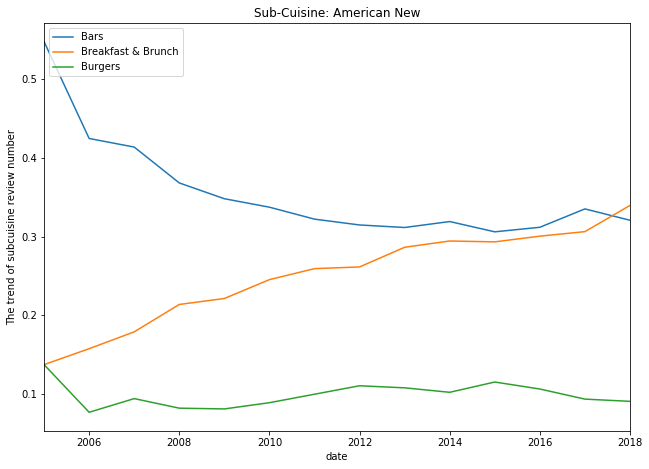

In [264]:
subcuisine_df_new[subcuisine_df_new['sub_cuisine'] == 'Bars'].review_rate.plot()
subcuisine_df_new[subcuisine_df_new['sub_cuisine'] == 'Breakfast & Brunch'].review_rate.plot()
subcuisine_df_new[subcuisine_df_new['sub_cuisine'] == 'Burgers'].review_rate.plot()
plt.ylabel('The trend of subcuisine review number')
plt.title('Sub-Cuisine: American New')
fig = plt.gcf()
fig.set_size_inches(10.5, 7.5)
plt.legend(['Bars','Breakfast & Brunch','Burgers'],loc = "upper left")
#fig.savefig('test2png.png', dpi=100)

plt.show()


In [256]:
mexican_review

,index,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,...,cuisine,sub_cuisine,review_id,user_id,stars_y,useful,funny,cool,text,date
date,,,,,,,,,,,,,,,,,,,,,
2018-09-26 03:26:43,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,...,Mexican,Breakfast & Brunch,QNmY376TXxnanuVVOd6jTQ,Hw8mxfICqErjwIVsC5rXUw,3.0,0.0,0.0,0.0,"I mean it's Taco Bell, so it is what it is. Ho...",2018-09-26 03:26:43
2012-03-06 14:06:35,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,...,Mexican,Breakfast & Brunch,q0uAJsHS8tU9Lxjp8HkH6w,qfA3pCsmjRdKl3CYVZ4p7w,1.0,0.0,1.0,0.0,"1 star for service, but the food is not ok :( ...",2012-03-06 14:06:35
2013-03-22 06:17:38,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,...,Mexican,Breakfast & Brunch,s-1UrmPhWuMtTQk-bearcg,ZQsculZs_WMVFnBGQee1EQ,4.0,1.0,0.0,0.0,Taco Bell has really improved over the years a...,2013-03-22 06:17:38
2017-08-11 03:00:35,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,...,Mexican,Breakfast & Brunch,LlZoEaNMmm5V6p_isMr_4g,8YHYABG7zc1s42OAMHAa6Q,5.0,1.0,1.0,1.0,This is one of the most exquisite Taco Belles ...,2017-08-11 03:00:35
2011-03-31 21:20:25,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,...,Mexican,Breakfast & Brunch,Xwr-yKAtZK04JaW7wTT-jA,8ZPOQA5k0mfC8H-aJpRHOw,4.0,0.0,1.0,0.0,What can you say about Taco Bell other than fr...,2011-03-31 21:20:25
2010-10-22 01:07:06,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,...,Mexican,Breakfast & Brunch,PbET8bD95_kwCqarRI85QQ,3PnzCtO4eEagc9vq9rZGNw,3.0,1.0,0.0,0.0,Every time I've gotten pizza here I've had to ...,2010-10-22 01:07:06
2018-06-23 15:49:30,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,...,Mexican,Breakfast & Brunch,aZDiKETZpB8rG2YCYjfzMA,BNjWNNc_FWDQggkwqKk6aQ,1.0,0.0,0.0,0.0,What's with all the bad attitudes Taco Bell? ...,2018-06-23 15:49:30
2008-09-22 01:36:43,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,...,Mexican,Breakfast & Brunch,2QhLPb_vHRTonk4dtZfirw,iL_CR-WQnveqrff9LecqAQ,2.0,8.0,12.0,7.0,"I feel dirty saying this, but I ate lunch here...",2008-09-22 01:36:43
2014-02-15 18:20:29,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,...,Mexican,Breakfast & Brunch,sBaCmV2g-EAIKyNHo173VA,84FuHcNTIIkkyMbO1I_gPA,5.0,8.0,12.0,10.0,"Roses are Red\nViolets are Blue,\nI'd be truly...",2014-02-15 18:20:29


In [257]:
mexican_review.sub_cuisine.value_counts()

Bars                  71945
Breakfast & Brunch    42318
Fast Food             34020
Tacos                 16872
Seafood               10653
Tex Mex                8990
Burgers                6534
Latin American         6237
Caterers               5758
Desserts               4237
Specialty Food         4076
Cafes                  3732
Sushi Bars             2534
Salad                  2139
Sandwiches             2132
Food Stands            2065
Pizza                  1949
Vegetarian             1536
Street Vendors         1114
Steakhouses            1071
Caribbean              1051
Comfort Food            715
Buffets                 524
Barbeque                502
Gluten Free             385
Hot Dogs                372
Chicken Wings           313
Creperies                40
Ethnic Food               7
Kosher                    7
Name: sub_cuisine, dtype: int64

In [233]:
subcuisine_mexican = mexican_review.groupby([mexican_review.index.year,'sub_cuisine'], as_index = True).agg({'review_id': 'count'})
subcuisine_mexican.columns = ['review_id_count']
subcuisine_mexican.reset_index(level=['sub_cuisine'],inplace = True)

In [234]:
subcuisine_mexican

,sub_cuisine,review_id_count
date,,
2005.0,Bars,3
2005.0,Breakfast & Brunch,4
2005.0,Desserts,1
2005.0,Fast Food,5
2005.0,Pizza,4
2005.0,Tex Mex,6
2006.0,Bars,32
2006.0,Breakfast & Brunch,17
2006.0,Buffets,1


In [238]:
subcuisine_mexican_copy.index

AttributeError: 'function' object has no attribute 'index'

In [239]:
subcuisine_mexican = mexican_review.groupby([mexican_review.index.year,'sub_cuisine'], as_index = True).agg({'review_id': 'count'})
subcuisine_mexican.columns = ['review_id_count']
subcuisine_mexican.reset_index(level=['sub_cuisine'],inplace = True)
subcuisine_mexican_copy = subcuisine_mexican.copy()
total_review = subcuisine_mexican_copy.groupby(subcuisine_mexican_copy.index).agg({'review_id_count': 'sum'})
total_review.columns = ['total_review_count']
subcuisine_mexican_new = pd.merge(subcuisine_mexican,total_review, how = 'left', left_index=True, right_index=True)
subcuisine_mexican_new['review_rate'] = subcuisine_mexican_new['review_id_count']/subcuisine_mexican_new['total_review_count']

In [240]:
subcuisine_mexican_new

,sub_cuisine,review_id_count,total_review_count,review_rate
date,,,,
2005.0,Bars,3,23,0.130435
2005.0,Breakfast & Brunch,4,23,0.173913
2005.0,Desserts,1,23,0.043478
2005.0,Fast Food,5,23,0.217391
2005.0,Pizza,4,23,0.173913
2005.0,Tex Mex,6,23,0.260870
2006.0,Bars,32,128,0.250000
2006.0,Breakfast & Brunch,17,128,0.132812
2006.0,Buffets,1,128,0.007812


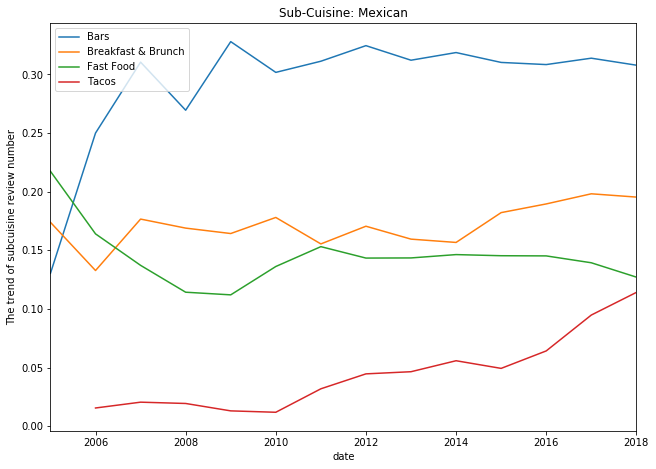

In [262]:
subcuisine_mexican_new[subcuisine_mexican_new['sub_cuisine'] == 'Bars'].review_rate.plot()
subcuisine_mexican_new[subcuisine_mexican_new['sub_cuisine'] == 'Breakfast & Brunch'].review_rate.plot()
subcuisine_mexican_new[subcuisine_mexican_new['sub_cuisine'] == 'Fast Food'].review_rate.plot()
subcuisine_mexican_new[subcuisine_mexican_new['sub_cuisine'] == 'Tacos'].review_rate.plot()
plt.ylabel('The trend of subcuisine review number')
plt.title('Sub-Cuisine: Mexican')
plt.legend(['Bars','Breakfast & Brunch','Fast Food','Tacos'],loc = "upper left")
fig = plt.gcf()
fig.set_size_inches(10.5, 7.5)

plt.show()